## События

События в Google Analytics предназначены для отслеживания взаимодействий пользователей с любыми
элементами сайта:
* клик по конкретной кнопке;
* отправка формы;
* отправка данных о транзакции;
* отслеживание звонков;
* просмотр видео;
* подписка на рассылку;
* скроллинг страницы;
* пролистывание галереи с фотографиями;
* переключение чек-боксов или любых других элементов;
* клики по иконкам социальных сетей;
* открытие / закрытие всплывающих окон на сайте;
* отслеживание действий в онлайн-консультантах, чатах (JivoSite, Callbackhunter, Venyoo, Talk-Me и т.д.);
* отслеживание событий, которые активируются после определенного времени или действия (например,
когда пользователь увел курсор мыши с какого-нибудь объекта);
* и т.д.


Браузерных событий очень много. Их также можно разделить на различные категории: 
* **ресурсные** или **события HTML-страницы** (load, beforeunload, unload)
* **сетевые события** (online, offline)
* **события мыши** (click,
dblclick, contextmenu и др.)
* **события клавиатуры** (keydown, keypress, keyup)
* **события формы** (submit, reset)
* **фокусные события** (focus, blur, focusin, focusout) и другие.

**Событие** – это определенное действие пользователя на сайте или в приложении в определенный момент
времени, например ``page_view`` (просмотр страницы), ``add_to_cart`` (добавление товара в корзину) и ``form_submit`` (отправка заполненной формы).

**Типы событий**

В GA4 можно отслеживать 4 типа событий:
1. **автоматически регистрируемые события** - события, которые Google собирает автоматически после создания и установки счетчика;
2. **улучшенная статистика** - дополнительные события, которые Google также собирает автоматически, но при условии, что в настройках ресурса вы включили эту функцию;
3. **рекомендуемые события** - события, которые уже заложены в систему GA4 для различных видов деятельности со стандартными именами и параметрами, прописанные в официальной документации, но которые вам необходимо донастроить под свои задачи;
4. **специальные события** - события, которые вы создаете самостоятельно под свои нужды

**Компоненты события в UA** \
В UA конструкция отслеживания зависит от библиотеки.
* Для ``analytics.js``:
```javascript
ga('send', 'event', 
[eventCategory], 
[eventAction], 
[eventLabel],
[eventValue], 
[nonInteraction]);
```
* Для ``gtag.js``:
```javascript
gtag('event', '<eventAction>', {
'event_category': <eventCategory>,
'event_label': <eventLabel>,
'value': <eventValue>,
'non_interaction': true
});
```

В обоих случаях присутствуют следующие компоненты:
1. ``eventCategory`` - Категория события, общее общее имя для группы объектов, которое нужно отслеживать. Например: кнопка, форма, ссылка и т.д.;
2. ``eventAction`` - Действие по событию, определяет тип взаимодействия пользователя с объектом сайта. Например: клик, просмотр, загрузка и т.д.;
3. ``eventLabel`` - Ярлык события, это категория (группа), к которой относится отслеживаемый объект. Например: «навигационное меню»;
4. ``eventValue`` - Ценность события, целочисленное значение, которое можно использовать для предоставления данных о событии пользователя, например: «время, сумма транзакции, прохождение n-ого уровня в игре и т.д.»
5. ``nonInteraction`` / ``non_interaction`` - без взаимодействия, может принимать значение true или false. Если передается true, то это событие никак не повлияет на параметры и показатели в отчетах UA, в том числе и на показатель отказов.


В случае GA4 вышеописанных компонет нет, а сама конструция имеет вид:
```javascript
gtag('event', '<event_name>', { //eventAction=event_name
'<parameter_1_name>': <parameter_1_value>,
'<parameter_2_name>': <parameter_2_value>,
'<parameter_3_name>': <parameter_3_value>,
});
```

```javascript
//Для UA
eventCategory: 'button'
eventAction: 'download'
eventLabel: '/'

//Для GA4
gtag('event', 'download', { //eventAction=event_name
'eventCategory': 'button',
'eventLabel': '/'
});
```
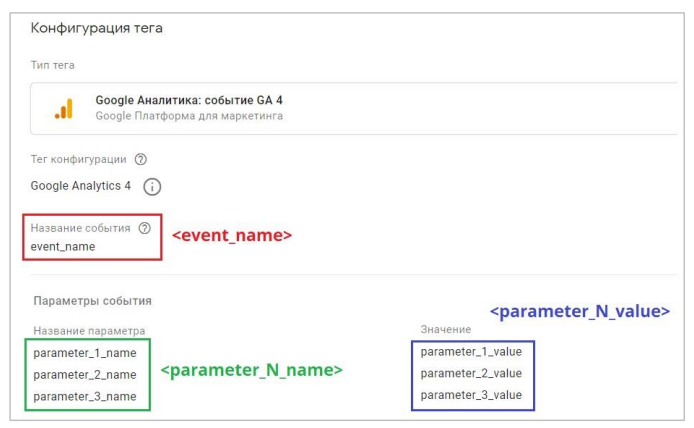

Пример из электронной комерции: любое событие из электронной торговли, где мы на уровне даталейера задаем название события, а внутри него передаем объекты в виде пары ключ:значение. Вот, например, событие ``purchase``:
```javascript
gtag('event', 'purchase', {//en
"transaction_id": "24.031608523954162",
"affiliation": "Google online store",
"value": 23.07,
"currency": "USD",
"tax": 1.24,
"shipping": 0,
"items": [
{
"id": "P12345",
"name": "Android Warhol T-Shirt",
"list_name": "Search Results",
"brand": "Google",
"category": "Apparel/T-Shirts",
"variant": "Black",
"list_position": 1,
"quantity": 2,
"price": '2.0'
},
{
"id": "P67890",
"name": "Flame challenge TShirt",
"list_name": "Search Results",
"brand": "MyBrand",
"category": "Apparel/T-Shirts",
"variant": "Red",
"list_position": 2,
"quantity": 1,
"price": '3.0'
}
]
});

```

По умолчанию для  всех событий, включая автоматические и специальные, Google собирает 5 параметров:
1. ``language`` (язык пользователя);
2. ``page_location`` (URL текущей страницы, из ``location.href``);
3. ``page_path`` (путь к странице, из ``location.pathname``);
4. ``page_title`` (название страницы, из ``document.title``);
5. ``screen_resolution`` (разрешение экрана).

Параметры, котоыре собираются после установки счетчика GA4:
1. ``page_location``;
2. ``page_path``;
3. ``page_title``;
4. ``page_referrer`` (URL предыдущей страницы). 

Ограничения событий GA4:
1. **уникальные названия событий - до 500**. Не учитываются события, которые регистрируются автоматически, например ``first_open`` и ``in_app_purchase``, а также события, которые вы отслеживаете с помощью улучшенной статистики;
2. **длина названия события - до 40 символов**;
3. **количество передаваемых параметров в событии - до 25**;
4. **длина названия параметра события - до 40 символов**;
5. **длина значения параметра события - до 100 символов**.


```javascript

```

```javascript

```

```javascript

```